# EDA Activity: Net Pracharat Usage in Province ช.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!python3 --version
np.version.version

Python 3.11.4


'1.25.2'

As data contains Thai characters, we need to load Thai fonts for matplotlib.

In [4]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font',family='TH Sarabun Chula')

Let's ingest our data file and take a look.

In [5]:
df = pd.read_csv('internetpracharat2.csv', index_col='ID')
df.head()

,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
ID,,,,,,,,,,,,,,,
1,2564,กรกฎาคม,4485d9000,SR711371,ภ.2,หมู่ 13 บ้านมะเกลือ,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM-SR711371,172.16.140.2,"4,901.45","86,793.12",403,57.0
2,2564,กรกฎาคม,4485d9001,SR711374,ภ.2,หมู่ 17 บ้านโนนทอง,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM-SR711374,172.16.140.10,"1,609.27","18,763.15",364,69.0
3,2564,กรกฎาคม,4486d9000,SR711628,ภ.2,หมู่ 1 เพชร,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711628,172.16.140.50,"6,318.99","91,007.66",693,182.0
4,2564,กรกฎาคม,4486d9001,SR711630,ภ.2,หมู่ 8 เพชรใต้,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711630,172.16.140.58,"2,753.82","71,735.24",855,260.0
5,2564,กรกฎาคม,4486d9002,SR711631,ภ.2,หมู่ 9 กุดตูม,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711631,172.16.140.66,"13,661.13","259,679.82",835,54.0


In [6]:
df.tail()

,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
ID,,,,,,,,,,,,,,,
1187,2564,กรกฎาคม,5343d9024,SR712885,ภ.3,หมู่ 10 เมืองหนอง,แม่สาว,แม่อาย,เชียงใหม่,CMI-SR712885,172.18.38.50,"9,793.36","156,548.58",982,87.0
1188,2564,กรกฎาคม,5343d9038,SR768854,ภ.3,หมู่ 15 โป่งไฮ,แม่สาว,แม่อาย,เชียงใหม่,CMI-SR768854,172.18.38.106,"31,328.40","572,314.84","1,542",235.0
1189,2564,กรกฎาคม,5343d9035,SR767884,ภ.3,หมู่ 3 ดอยชัยเหนือ,แม่อาย,แม่อาย,เชียงใหม่,CMI-SR767884,172.18.38.98,"6,617.29","161,646.30",537,63.0
1190,2564,กรกฎาคม,5343d9015,SR705362,ภ.3,หมู่ 9 ปางต้นเดื่อ,แม่อาย,แม่อาย,เชียงใหม่,CMI-SR705362,172.18.37.234,"18,093.46","329,186.49","1,816",129.0
1191,2564,กรกฎาคม,5343d9016,SR705364,ภ.3,หมู่ 13 ดอยแหลม,แม่อาย,แม่อาย,เชียงใหม่,CMI-SR705364,172.18.37.242,"67,993.63","1,045,299.83","4,715",194.0


In [7]:
df.shape

(1191, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 1 to 1191
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         1191 non-null   int64  
 1   MONTH        1191 non-null   object 
 2   CIRCUIT_NO   1191 non-null   object 
 3   APP_CODE     1191 non-null   object 
 4   REGION       1191 non-null   object 
 5   VILLAGE      1191 non-null   object 
 6   SUBDISTRICT  1191 non-null   object 
 7   DISTRICT     1183 non-null   object 
 8   PROVINCE     1191 non-null   object 
 9   AP_NAME      1191 non-null   object 
 10  IP_ADDRESS   1191 non-null   object 
 11  UPLOAD       1188 non-null   object 
 12  DOWNLOAD     1187 non-null   object 
 13  NUM_USERS    1187 non-null   object 
 14  NUM_DEVICES  1187 non-null   float64
dtypes: float64(1), int64(1), object(13)
memory usage: 148.9+ KB


We need to convert data types of numeric columns first.

In [9]:
df['UPLOAD']=df['UPLOAD'].str.replace(',','')
df['UPLOAD']=df['UPLOAD'].astype('float')
df['DOWNLOAD']=df['DOWNLOAD'].str.replace(',','')
df['DOWNLOAD']=df['DOWNLOAD'].astype('float')
df['NUM_USERS']=df['NUM_USERS'].str.replace(',','')
df['NUM_USERS']=pd.to_numeric(df['NUM_USERS'], errors='coerce')
df['NUM_DEVICES']=pd.to_numeric(df['NUM_DEVICES'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 1 to 1191
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         1191 non-null   int64  
 1   MONTH        1191 non-null   object 
 2   CIRCUIT_NO   1191 non-null   object 
 3   APP_CODE     1191 non-null   object 
 4   REGION       1191 non-null   object 
 5   VILLAGE      1191 non-null   object 
 6   SUBDISTRICT  1191 non-null   object 
 7   DISTRICT     1183 non-null   object 
 8   PROVINCE     1191 non-null   object 
 9   AP_NAME      1191 non-null   object 
 10  IP_ADDRESS   1191 non-null   object 
 11  UPLOAD       1188 non-null   float64
 12  DOWNLOAD     1187 non-null   float64
 13  NUM_USERS    1187 non-null   float64
 14  NUM_DEVICES  1187 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 148.9+ KB


Now, numeric columns are numeric.

In [11]:
df.describe()

,YEAR,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
count,1191.0,1188.000000,1.187000e+03,1187.000000,1187.000000
mean,2564.0,14939.224694,2.401545e+05,1034.210615,88.794440
std,0.0,13045.217364,1.941619e+05,734.747364,54.370907
min,2564.0,0.000000,0.000000e+00,0.000000,0.000000
25%,2564.0,4901.720000,8.439467e+04,486.000000,53.000000
50%,2564.0,11810.400000,1.953455e+05,913.000000,78.000000
75%,2564.0,21400.615000,3.533752e+05,1420.500000,113.000000
max,2564.0,135743.910000,1.382876e+06,5933.000000,534.000000


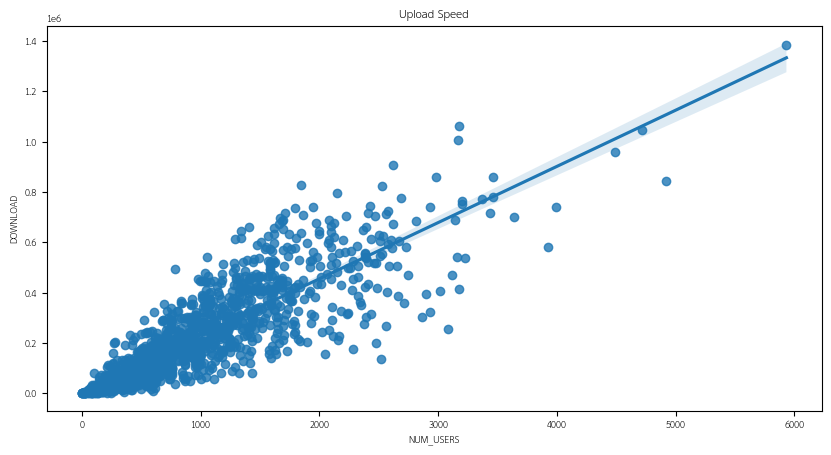

In [12]:
plt.figure(figsize=(10,5))
sns.regplot(x='NUM_USERS', y='DOWNLOAD', data=df)
plt.title('Upload Speed')
plt.show()

In [13]:
# list of province name start with 'ช'
df[df['PROVINCE'].str.startswith('ช')]['PROVINCE'].unique()


array(['ชัยภูมิ', 'ชลบุรี', 'ชัยนาท'], dtype=object)

In [14]:
# show all data of province name start with 'ช'
df[df['PROVINCE'].str.startswith('ช')]


,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
ID,,,,,,,,,,,,,,,
1,2564,กรกฎาคม,4485d9000,SR711371,ภ.2,หมู่ 13 บ้านมะเกลือ,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM-SR711371,172.16.140.2,4901.45,86793.12,403.0,57.0
2,2564,กรกฎาคม,4485d9001,SR711374,ภ.2,หมู่ 17 บ้านโนนทอง,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM-SR711374,172.16.140.10,1609.27,18763.15,364.0,69.0
3,2564,กรกฎาคม,4486d9000,SR711628,ภ.2,หมู่ 1 เพชร,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711628,172.16.140.50,6318.99,91007.66,693.0,182.0
4,2564,กรกฎาคม,4486d9001,SR711630,ภ.2,หมู่ 8 เพชรใต้,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711630,172.16.140.58,2753.82,71735.24,855.0,260.0
5,2564,กรกฎาคม,4486d9002,SR711631,ภ.2,หมู่ 9 กุดตูม,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711631,172.16.140.66,13661.13,259679.82,835.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2564,กรกฎาคม,4481d9096,SR670365,ภ.2,หมู่ 11 ผาทอง,วังทอง,ภักดีชุมพล,ชัยภูมิ,CPM-SR670365,172.16.146.210,4116.62,109246.63,382.0,55.0
1137,2564,กรกฎาคม,4481d9099,SR670376,ภ.2,หมู่ 5 ดงสวรรค์,แหลมทอง,ภักดีชุมพล,ชัยภูมิ,CPM-SR670376,172.16.146.234,1822.40,35846.53,200.0,45.0
1138,2564,กรกฎาคม,4481d9100,SR670377,ภ.2,หมู่ 6 วังตะกู,แหลมทอง,ภักดีชุมพล,ชัยภูมิ,CPM-SR670377,172.16.146.242,34020.25,409141.72,3016.0,124.0


PROVINCE
ชลบุรี     Axes(0.125,0.11;0.775x0.77)
ชัยนาท     Axes(0.125,0.11;0.775x0.77)
ชัยภูมิ    Axes(0.125,0.11;0.775x0.77)
Name: DOWNLOAD, dtype: object

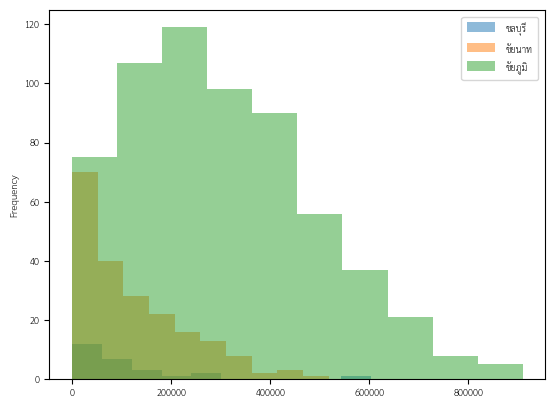

In [15]:
# group by province start with 'ช' and show first row of each group
#df[df['PROVINCE'].str.startswith('ช')].groupby('PROVINCE').first()

# plot line graph of DOWNLOAD by province start with 'ช' and show first row of each group
#df[df['PROVINCE'].str.startswith('ช')].groupby('PROVINCE')['DOWNLOAD'].plot(legend=True, alpha=0.5)

df[df['PROVINCE'].str.startswith('ช')].groupby('PROVINCE')['DOWNLOAD'].plot.hist(legend=True, alpha=0.5)

In [16]:
# count of ID in each province start with 'ชัยภูมิ'
df.PROVINCE[df['PROVINCE'].str.startswith('ช')].value_counts()

PROVINCE
ชัยภูมิ    619
ชัยนาท     203
ชลบุรี      26
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

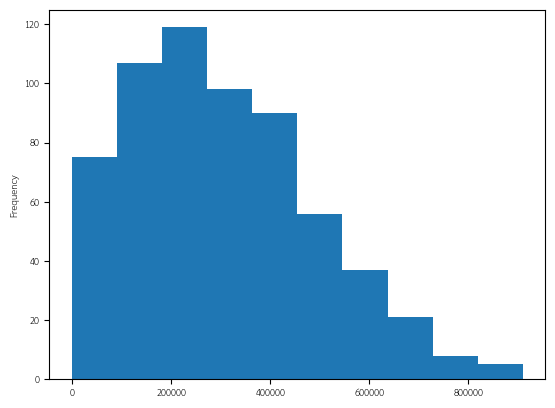

In [17]:
# plot histogram of DOWNLOAD by province start with 'ชัยภูมิ'
df[df['PROVINCE'].str.startswith('ชัยภูมิ')]['DOWNLOAD'].plot.hist()

<Axes: xlabel='PROVINCE'>

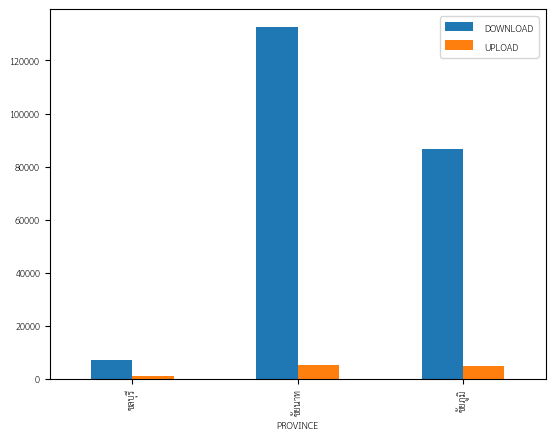

In [18]:
# df[df['PROVINCE'].str.startswith('ช')].groupby('PROVINCE').first()
# plot bar chart of DOWNLOAD and UPLOAD by province
df[df['PROVINCE'].str.startswith('ช')].groupby('PROVINCE').first()[['DOWNLOAD','UPLOAD']].plot.bar()


<Axes: xlabel='PROVINCE'>

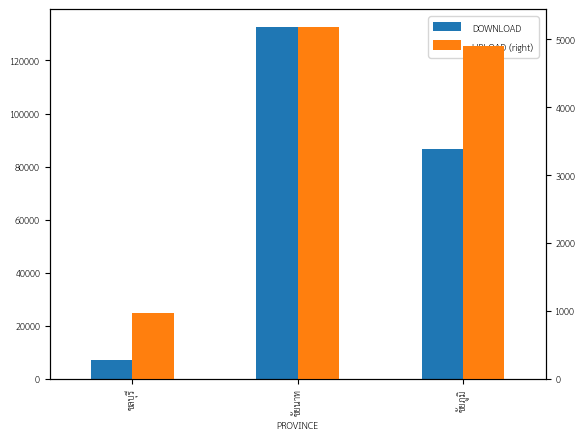

In [19]:
# sns bar plot dual y axis is DOWNLOAD and  UPLOAD by province start with 'ช' 
df[df['PROVINCE'].str.startswith('ช')].groupby('PROVINCE').first()[['DOWNLOAD','UPLOAD']].plot.bar(secondary_y='UPLOAD')



<Axes: xlabel='PROVINCE', ylabel='UPLOAD'>

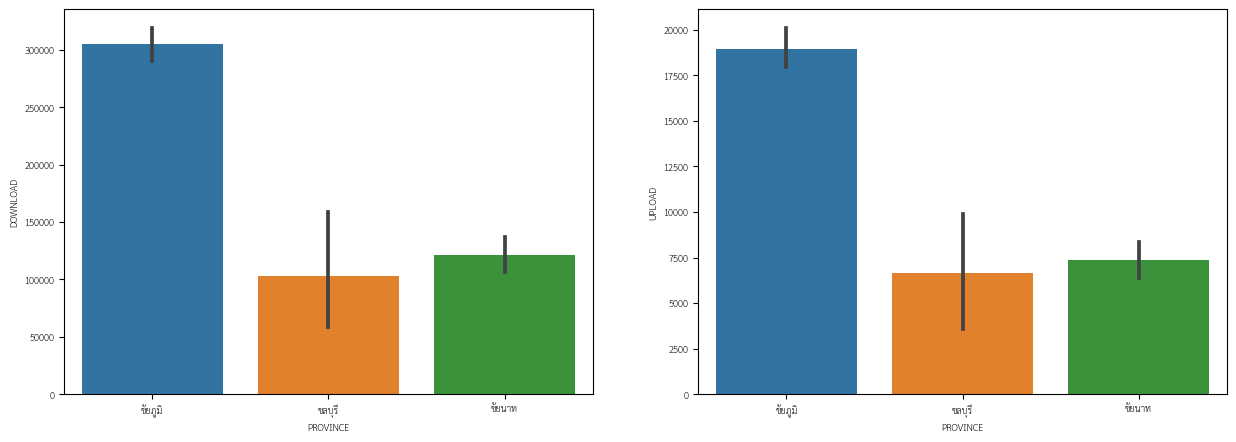

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x='PROVINCE', y='DOWNLOAD', data=df[df['PROVINCE'].str.startswith('ช')], ax=ax[0])
sns.barplot(x='PROVINCE', y='UPLOAD', data=df[df['PROVINCE'].str.startswith('ช')], ax=ax[1])
